# Notebook made by

__Names__: Daniël Vermaas, Jan Bakker, Jan Hündling

__Student ids__: 12208698, 12518948, 11854375

# IR0 TREC STYLE EVALUATION project

Here we describe the project. The overall description is  in the PDF file which belongs to this weeks assignment. Below you find more specific requirements.


## Data

The documents, queries, qrels, trec_eval and two notebooks doing some tests on the train and test sets are available as a zip file `trec_uncompressed_1.zip` at Canvas --> Files--> Week5. Unzipping it yields a folder with these subfolders: docs		notebooks	qrels		queries		trec_eval-9.0.7.

* notebooks contain 2 notebooks with some EDA on the train and test queries and qrels.
* `trec_eval-9.0.7.` contains code to run evaluation scripts. 

## Input and output of your system

Your complete system doing everything should run in the cell below after the command `runmyexperiment()`.
We will run your system on a copy of the data file you downloaded, except that we have different qrels and different queries in `queries_test.txt` (but on the same documents).

In order to run all systems smoothly you need to keep to the following rules about in- and out-put.

### Input

When we run your code, the folder `trec_uncompressed_1` (obtained when unzipping the zip file) is in this path from your notebook: `../../..`. See the output of the `ls` command below. So please put your folder in the same place when you create your code, and do use and do not change the `trec_data_path` variable.

### Output

#### Trec result Output 

Your output is in trec result file output format. For explanation see <http://www.rafaelglater.com/en/post/learn-how-to-use-trec_eval-to-evaluate-your-information-retrieval-system>.   

**For each query, you can rank and score up to 1000 documents.**

Save your three trec result files using this template  `result_<train|test>_<yourstudentID>_<BM25|TFIDF|LM>.csv` (thus eg, `results_train_12345678_TFIDF.csv` using the code provided. These files are saved  in the same folder as this notebook.
You do not hand these in. 
Make sure the unit tests provided succeed.   **Use the student id of the leader of your group: the person who submits the assignment on Canvas.**

#### Report output

Next to saving  the result files, you make sure that the output  also returns a "report" on your 
systems containing the following

1. You make three systems: a BM25 ranker, a TF-IDF vector space ranker and a language modelling ranker. You are free to choose and optimize the specific hyperparameters (and/or eg the used definitions of tf and idf, etc).
2. Create an averaged 11 point interpolated precision recall graph  for your three systems. One plot please. See <https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-ranked-retrieval-results-1.html#fig:trec-11-point> for an example.
4. Create a graph with   for each system, the distribution of the obtained AP values, plus a kernel density estimation (a `seaborn` histogram with `kde`: you can make this with `sns.displot`). Create a table which gives the results of `pandas.describe()` for the ap values of the three systems. 
4. Create a (pandas) table with MAP values and interpolated average precision values for 11 recall values, for your three systems, comparable to [Table 12.3 in the MRS book](https://nlp.stanford.edu/IR-book/html/htmledition/ponte-and-crofts-experiments-1.html). 
    * you decide yourself which system is the baseline to which you compare (with significance tests) the other systems.
5. Create two plots for your LM models, one for Jellinek-Mercer smoothing and one for Dirichlet smoothing. In both plots you put the smoothing hyperparameter on the x-axis, and the corresponding MAP value on the y-axis.
6. **Give all plots and  tables self explaining captions, and good labels on the axis.**
7. You best use `trec_eval`   in your code. Make sure it is placed in the path `'../../../trec_uncompressed_1/trec_eval-9.0.7/` from the folder with this notebook. Please use the variable `trec_eval_path` for the path. When we run your notebook, the trec eval folder is also there. 
8. **Note that these tables and plots cannot be hardcoded as they are produced when we grade your system using a different set of queries and qrels.** 

### Produce these plots and results twice.

* You produce these plots for the train queries and train qrels, and we will see them as you have seen them.
* You will also produce them for the test queries that you have never seen, and we will see them (and you too, when you see your notebook in the github repo back)
* the same holds for the result files: your produce three for the train, and three for the test.

#### How this works

* In **your version** of `trec_uncompressed_1` you find identical train and test query and qrel files. Thus you produce twice the same results.
* In **our version** of `trec_uncompressed_1`, the train and test files are different, and thus also the produced plots, and result files.

### Reflection

You write a short reflection in Markdown in which you reflect on this project. Discuss the main steps: 
1. preprocessing, 
2. tokenization, 
3. indexing, 
3. ranking, 
4. tuning your models, and 
5. evaluation. 

Indicate whether you are content with your results, and if they are line with the book.

## How we review your project

1. We download your submission and run all cells automatically. 
    * We set a **time limit of 2 hours of wall clock time** for running your notebook on a MacBook Pro with 2.9 GHz Intel Core i5, and 16Gb RAM. We run the submissions sequentially and have little other workload.
    * Your complete processing pipeline should run in this time. 
    * You may write temporary files to the folder in which your notebook is residing. 
2. The folders `trec_uncompressed_1` and `trec_eval-9.0.7` are available in the indicated paths. And eg running  (from the trecc eval folder)  `! trec_eval -m map -m P.5,10 test/qrels.test test/results.test ` in your notebook yields results.
3. We automatically collect your `results<..>.csv` files   and use `trec_eval` for computing your MAP score. We use your studentID and code run in the leaderboard.
4. We will **manually** look at the outputted plots and tables, and at your reflection.

### Scoring table

You can receive a maximum of 10 points.

| **Part** | **Points** |
| :-- | :--: |
|Reflection| 2|
|Overall look and feel| 1|
|MAP score| ${3\frac{YourMAP}{MaxMAP}}$|
| PR plot| 1|
|AP table with significance tests| 1|
| AP distribution plot| 1|
|LM smoothing parameters| 1|
 
 
Here, $\mathit{MaxMAP}$ is the highest MAP over all submitted systems on the held-out test set. 





# Reflection (2 pts)

>In the cell below you write your reflection in markdown. You may use figures, but make sure they are stored at the web.

Reflection assignment week 5	

1. Preprocessing

All files within the documents folder are found using the os.walk() function, this ensures that all files are found, regardless of nesting (like ‘wsj’, which uses subfolders). After this we select all documents within the files. This is done by using regular expressions. We tried using BeautifulSoup to extract the document and corresponding texts, but found its functions for extracting text from .xml files to be unreliable. Therefore, we also used regular expressions to extract text and document numbers from the .xml files. We remove tags of the form <...> from the text and we also take care to merge multiple text fields when a document has multiple. 

2. Tokenizing

Tokenizing is done both on the text from the documents and on the queries. First, the text is divided into individual words using the nltk.word_tokenize function. Each of these tokens is then stemmed using the Porter stemmer, to further simplify the index. We use a look-up table of previously stemmed words, in order to speed up the tokenizing process. Stemming reduces the index complexity, because it reduces tokens to simpler forms. This way, we can not only match query terms with documents containing them, but also with documents containing words of a similar form, which could of course also be relevant to the query. Some experimentation was done by dividing words like ‘two-components’ into ‘two’ and ‘components’, but those changes did not seem to affect results.

3. Indexing

Indexing is done much like in the previous homework assignments. Each token is stored in a dictionary, consisting of: the number of documents that contain the term (document frequency), the frequency of the term in the entire corpus (corpus frequency), and a dictionary containing number of times the term occurs per document (frequency per document / term frequency). Some other, not token specific information is stored within the index: The number of tokens per document, the amount of tokens in the entire corpus, the number of documents and files, and the amount of unique tokens. Although these numbers could also be computed from the term frequencies dictionary in the ranking step, only having to compute them once can save a lot of time. After the index is built, it is stored on disk, so that we can save time reading instead of computing it the next time we want to use it.

4. Ranking

For each query in the database, all documents are ranked using three different systems. The higher its score, the more relevant a document is considered to be. The highest 1000 ranking docs for both the training and test queries are stored in a results file. This file is later used to calculate the MAP of each system. 

The first system is the tf-idf model: It computes the score of a document for a given query term as the term frequency times the inverse document frequency, divided by the length of the document vector in order to treat long and short document equally. The score of a multi-term query is then the sum of these scores.

The second system is the Okapi BM25 model. The BM25 is a bag-of-words model that computes the score of a document and query pair by summing the information given that a document contains a query term. The model has 2 parameters. One parameter adjusts the scaling of the term weight by the amount of length normalization. The other parameter adjusts between the use of binary term frequency and raw term frequency.

The third and final model is LM. The LM model is a unigram model and is capable of two types of smoothing; Jellinek-Mercer smoothing, and Dirichlet smoothing. Jellinek-Mercer smooths between the probability of a term occurring in the document and all documents (corpus). Both of these are assigned a weight in the form of lambda. If document probability is 0.9, corpus probability will be 1 - 0.9. So this model uses only one parameter. Dirichlet smoothing is a bit more complicated. It uses both the length of the document and the probability of the term occurring within the corpus. It uses mu as a parameter, and this parameter should reflect the average document length of the corpus, according to IR literature.

5. Tuning the models

Our initial tf-idf model had a fairly low map score of about 0.2. We therefore divided the tf-idf by the length of the document vector, and that improved the MAP score. The Idf was also adjusted to be N/df instead of log(N/df), because this improved results even more. We did not change the definition of the term frequency to 1 + log(tf), because this lowered the map score. After these changes the highest achieved MAP score was 0.0607, which is respectable, but means that this model still performs the least out of all the models.

Due to time constraints, no tuning has been done on the BM25 model, but the values of the parameters alpha and beta have been set to values, which are generally considered to work well for the system. This causes the BM25 model to have the best overall MAP score: 0.1344.

For the LM system, extensive optimization has been performed. The MAP values for both Jellinek-Mercer smoothing and Dirichlet smoothing with different smoothing parameters have been plotted. From these plots, we could conclude that Dirichlet smoothing with a mu_mult = 5 (so mu = 5 * average document length) gives us the optimal map score of 0.1398. Therefore, this is the standard value used when ranking the documents. We decided to choose Jellinek Mercer over Dirchet smoothing, because it was faster, and provided better results. We first used both description and title to construct queries for this model, because it looked very promising. But in the end using only the title, just like the other models, proved faster and more accurate. LM Dirichlet is also the best out of all the models, beating BM25 by a small margin.

6. Evaluation

In conclusion, the BM25 system gives the best results with a MAP score of 0.1344. If we had more time, we would even be able to find the optimal parameters for this model, so that this score would be even higher. The LM system with Dirichlet smoothing and its optimized parameter also works well, with a MAP of 0.1398. Due to its simplicity, the tf-idf model only has a MAP score of 0.0607. These results are in line with the book, which states that the tf-idf model does perform less, and that the other two systems both work well. Overall, we are content with the results for the BM25 and LM systems, while we think that the MAP of the tf-idf model could have been significantly higher if we had managed to implement the vector space model.


11-10-2021
Jan Hundling 11854375
Jan Bakker 12518948  
Daniël Vermaas 12208698


# Code for the search engine

## Preliminaries

In [1]:
'''
Please import all packages here (and optionally download nltk data if you do not have it).
'''
import timeit
import os
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import re
from collections import Counter, defaultdict
from tqdm import tqdm_notebook as tqdm

import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

%matplotlib inline
#%load_ext memory_profiler # if needed run !pip install memory_profiler

In [2]:
# do make and run a test
# %cd ../../../trec_uncompressed_1/trec_eval-9.0.7
# ! make 
# !head test/results.test   # how does the output look?

In [3]:
# handy paths
trec_data_path= '../../../trec_uncompressed_1/'
trec_eval_path= trec_data_path+'trec_eval-9.0.7/'

# just testing
test_dir= trec_eval_path+'test/'

# test whether your data is OK # should return a list of directories
%ls -l $trec_data_path

# test your trec_eval: should return: map                   	all	0.1785
! $trec_eval_path/trec_eval -m map  $trec_eval_path/test/qrels.test $trec_eval_path/test/results.test 

total 20
drwxrwxr-x 7 dvermaas dvermaas 4096 oct.   1 16:25 docs/
drwxrwxr-x 3 dvermaas dvermaas 4096 oct.   1 16:26 notebooks/
drwxrwxr-x 3 dvermaas dvermaas 4096 oct.  11 00:55 qrels/
drwxrwxr-x 2 dvermaas dvermaas 4096 oct.   7 16:37 queries/
drwxrwxr-x 4 dvermaas dvermaas 4096 oct.   2 17:35 trec_eval-9.0.7/
map                   	all	0.1785


In [4]:
import math as m

def BM25(query, index, a=1.5, b=0.75):
    """
    Given a query, score the documents according to the BM25 scoring
    scheme and return a list of  (document, score) pairs  in decreasing order
    """

    avg_D_len = sum(index['DocSizes'].values()) / len(index['DocSizes'])
      
    # Store all scores per document calculated by Okapi BM25 formula in dict
    Okapi_dict = {}
    for Qi in query:
        DocFreq = index[Qi]['DocFreq'] if Qi in index else 0
        # IDF smoothed to prevent division by zero
        IDF_smooth = (m.log((index['TotalDocuments'] / (1 + DocFreq)),2) + 1)
        
        if Qi in index:
            for D, termfreq in index[Qi]['Freq_per_Doc'].items():
                D_len = index['DocSizes'][D]
                rawcount = termfreq
                D_score = IDF_smooth * ((rawcount * (a + 1)) / (rawcount + (a * 1 - b + b * (D_len / avg_D_len))))    
    
                if D in Okapi_dict:    
                    Okapi_dict[D] += D_score
                else:
                    Okapi_dict[D] = D_score
                    
    return sorted(Okapi_dict.items(), key=lambda item: item[1], reverse=True)[:1000]



def tfidf(word, document, index):
    """
    Given a single query term and a document, score the document using
    tf-idf.
    """
    # if this is called we already know it is in index
    tf = index[word]["Freq_per_Doc"][document]
    idf = index["TotalDocuments"] / index[word]['DocFreq']
    
    return tf * idf / index['DocNorms'][document]


def rankedSearchTfidf(query,index):
    """
    Given a query, score the documents according to the tf-idf scoring
    scheme and return  the documents and scores in decreasing order.
    """
    # Make dict that stores document as keys and summed tf-idf score for query
    score = defaultdict(float)
    
    for word in query:
        if word in index:
            for doc in index[word]['Freq_per_Doc']:
                score[doc] += tfidf(word, doc, index)
 
    return sorted(score.items(), key=lambda item: item[1], reverse=True)[:1000]




#Jellinek-Mercer smoothing and one for Dirichlet smoothing
def LM(query, index, model ='Jellinek-Mercer', lamb=.5, mu_mult=5):
    mu = mu_mult * np.mean(list(index['DocSizes'].values()))
    
    # Store all word probabilities
    score = defaultdict(lambda : 1.0)
    black_list = set()
    
    if model == 'Jellinek-Mercer':
    # Fetch probabilities of all words
        for word in query:
            if word in index:
                p_collection = index[word]["CorpusFreq"] / index['CollectionSize']
                for doc in index['DocSizes']:
                    # Check if term exists in doc
                    if doc in index[word]["Freq_per_Doc"]:
                        tf = index[word]["Freq_per_Doc"][doc]
                        p_doc = tf / index['DocSizes'][doc]
                        p_word = lamb * p_doc + (1 - lamb) * p_collection
                    else:
                        p_word = (1 - lamb) * p_collection               
                    score[doc] *= p_word
    
    if model == 'Dirichlet smoothing':
        for word in query:
            if word in index:
                p_collection = index[word]["CorpusFreq"] / index['CollectionSize']
                for doc in index['DocSizes']:
                    if doc in index[word]["Freq_per_Doc"]:
                        tf = index[word]["Freq_per_Doc"][doc]
                    else:
                        tf = 0
                    p_word = (tf + mu * p_collection) / (index['DocSizes'][doc] + mu)
                    
                    score[doc] *= p_word
    
    # Return results sorted from high to low
    return sorted(score.items(), key=lambda item: item[1], reverse=True)[:1000]




In [5]:
def formatranking(rankedlist, query_id):
    """
    This function takes a ranked list in decreasing order of 1000 tuples (document, score)
    and returns [[query-id Q0 document-id rank score STANDARD], ......]
    """
    formattedlist = []
    rank = 1
    for docno, score in rankedlist:
        formattedlist.append([query_id, 'Q0', docno, rank, score, 'STANDARD'])
        rank += 1
        
    return formattedlist

In [6]:
# plotting tools
from IPython.display import display, HTML

import matplotlib.pyplot as plt


def get_results(run, model, studid):
    resultfile= 'results_'+run+'_'+str(studid)+'_'+model
    qrelsfile = trec_data_path+'/qrels/qrels_'+run+'.txt'
        
    results = ! $trec_eval_path/trec_eval -m map -m iprec_at_recall $qrelsfile $resultfile
    return [float(measure.split('\t')[2]) for measure in results]     


def PR_plot(run, studid):
    recall = np.arange(0, 1.01, 0.1)

    for model in ["TFIDF", "BM25", "LM"]:
        results = get_results(run, model, studid)
        
        plt.plot(recall, results[1:], label=model, marker='o')
    
    plt.title('Interpolated precision recall graph for the ' + run + ' set')
    plt.ylabel('Interpolated precision')
    plt.xlabel('Recall')
    plt.legend()
    plt.show()
    
    print('Interpolated precision on 11 points plotted against the recall for each system.')
    
    
def AP_graph(run, studid):
    qrelsfile = trec_data_path+'/qrels/qrels_'+run+'.txt'
    
    data = defaultdict(list)
        
    for model in ["TFIDF", "BM25", "LM"]:
        resultfile= 'results_'+run+'_'+str(studid)+'_'+model
        
        results = ! $trec_eval_path/trec_eval -q -m map $qrelsfile $resultfile
        
        data[model] = [float(measure.split('\t')[2]) for measure in results[1:]]
        
    df = pd.DataFrame(data)
    
    sns.displot(df, kde=True)
    
    plt.title('Average precision distribution for the ' + run + ' set')
    plt.xlabel('Average precision')
    
    plt.show()
    
    print('Distribution of the average precision values for each system.')
    
    display(HTML(df.describe().to_html())) 
    
    print('Table describing the dataframe with the AP values for each system.')
    

def calculate_change(old_values, new_values):
    return [(new-old)/old*100 if old else '-' for old, new in zip(old_values, new_values)]
    

def AP_table(run, studid):
    data = {'Recall': list(np.arange(0, 1.01, 0.1)) + ['Map']}

    for model in ["TFIDF", "BM25", "LM"]:
        results = get_results(run, model, studid)
        
        data['AP for ' + model] = results[1:] + [results[0]]
        
        if model in ["BM25", "LM"]:
            name = '% Change for ' + model
            data[name] = calculate_change(data['AP for TFIDF'], data['AP for ' + model])
    
    df = pd.DataFrame(data)
    display(HTML(df.to_html())) 
    
    print('Table with MAP and average precision values for each system.')
    print('The BM25 and LM system are compared to the TFIDF system using significance tests.')

In [7]:
# LM Plotting functions
def LM_lambda_plot(index):
    y_out = []
    for query_set in ['train','test']:
        path = trec_data_path + 'queries/queries_' + query_set + '.csv'
        stemmer  = PorterStemmer()
        qset = pd.read_csv(path)

        q_titles = [nltk.word_tokenize(sentence) for sentence in qset['title']]
        q_titles = [[stemmer.stem(word) for word in query] for query in q_titles]
        q_tpl = list(zip(list(qset['q_id']), q_titles))

        for i in range(0,11,2):
            formatted_ranks = []
            for q_id, q_title in q_tpl:
                TFIDFranking = LM(q_title, index, lamb=i/10)
                formatted_ranks.append(formatranking(TFIDFranking, q_id))
            resultslist = [doc for query in formatted_ranks for doc in query]
            df = pd.DataFrame(resultslist)
            df.to_csv('lambda='+str(i/10)+'lm', sep='\t', header=None, index=False)
            print('working', int(i/2)+1,'/6')

        resultfiles= !ls lambda*
        y_lambda_map = []
        for f in resultfiles:
            if query_set == 'train':
                mp = ! $trec_eval_path/trec_eval -m map  $trec_data_path/qrels/qrels_train.txt $f
            else:
                mp = ! $trec_eval_path/trec_eval -m map  $trec_data_path/qrels/qrels_test.txt $f
            mp = mp.get_list()[0].split('\t')[2]
            y_lambda_map.append(float(mp))
        plt.plot([i/10 for i in range(0,11,2)], y_lambda_map, label=query_set)
    plt.title('LM MAP for Jellinek-Mercer smoothing with different parameter values')
    plt.xlabel('Lambda value')
    plt.ylabel('MAP')
    plt.legend()
    plt.show()
    
def LM_mu_plot(index):
    y_out = []
    for query_set in ['train', 'test']:
        path = trec_data_path + 'queries/queries_' + query_set + '.csv'
        stemmer  = PorterStemmer()
        qset = pd.read_csv(path)

        q_titles = [nltk.word_tokenize(sentence) for sentence in qset['title']]
        q_titles = [[stemmer.stem(word) for word in query] for query in q_titles]
        q_tpl = list(zip(list(qset['q_id']), q_titles))

        for i in range(0,20,5):
            formatted_ranks = []
            for q_id, q_title in q_tpl:
                LMranking = LM(q_title, index, model='Dirichlet smoothing', mu_mult=i)
                formatted_ranks.append(formatranking(LMranking, q_id))
            resultslist = [doc for query in formatted_ranks for doc in query]
            df = pd.DataFrame(resultslist)
            df.to_csv('mu='+str(i)+'lm', sep='\t', header=None, index=False)
            print('working', int((i/5)+1),'/4')

        resultfiles= !ls mu*
        y_lambda_map = []
        for f in resultfiles:
            if query_set == 'train':
                mp = ! $trec_eval_path/trec_eval -m map  $trec_data_path/qrels/qrels_train.txt $f
            else:
                mp = ! $trec_eval_path/trec_eval -m map  $trec_data_path/qrels/qrels_test.txt $f
            mp = mp.get_list()[0].split('\t')[2]
            y_lambda_map.append(float(mp))
        ml = np.mean(list(index['DocSizes'].values()))
        plt.plot([i * ml for i in range(0,20,5)], y_lambda_map, label=query_set)
    plt.title('MAP for Dirichlet smoothing with different parameter values')
    plt.xlabel('Mu value')
    plt.ylabel('MAP')
    plt.legend()
    plt.show()
    print('(Only plotted for multipliers 0, 5, 10, 15 due to time constraints)')

## Your code

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


<ipython-input-8-a56174e6e7da>:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(files):


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

Writing index to disk...
index_build_time: 18 m 36 s
0/6 starting evaluation...
1/6 0 m 48 s  filename: results_train_12208698_BM25
2/6 1 m 11 s  filename: results_train_12208698_TFIDF
3/6 4 m 15 s  filename: results_train_12208698_LM


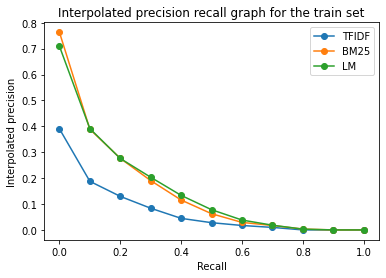

Interpolated precision on 11 points plotted against the recall for each system.


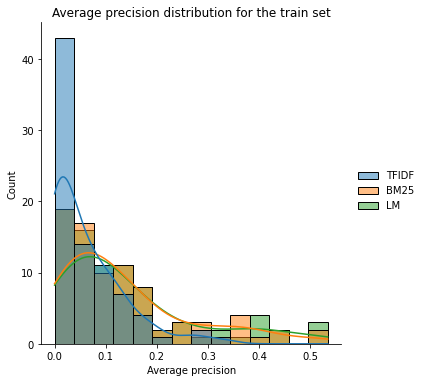

Distribution of the average precision values for each system.


,TFIDF,BM25,LM
count,83.000000,83.000000,83.000000
mean,0.061412,0.135814,0.141395
std,0.070109,0.126020,0.135072
min,0.000000,0.003500,0.001700
25%,0.008450,0.045700,0.042600
50%,0.034600,0.094900,0.099200
75%,0.093600,0.171750,0.184550
max,0.327100,0.522800,0.534400


Table describing the dataframe with the AP values for each system.


,Recall,AP for TFIDF,AP for BM25,% Change for BM25,AP for LM,% Change for LM
0,0.0,0.3904,0.7633,95.517418,0.7095,81.73668
1,0.1,0.1877,0.3888,107.139052,0.3911,108.364411
2,0.2,0.1295,0.2763,113.359073,0.2758,112.972973
3,0.3,0.0837,0.1904,127.479092,0.2033,142.891278
4,0.4,0.0446,0.1154,158.744395,0.1333,198.878924
5,0.5,0.0279,0.0625,124.014337,0.0780,179.569892
6,0.6,0.0171,0.0290,69.590643,0.0381,122.807018
7,0.7,0.0097,0.0171,76.28866,0.0182,87.628866
8,0.8,0.0000,0.0032,-,0.0030,-
9,0.9,0.0000,0.0000,-,0.0000,-


Table with MAP and average precision values for each system.
The BM25 and LM system are compared to the TFIDF system using significance tests.
4/6 0 m 46 s  filename: results_test_12208698_BM25
5/6 1 m 8 s  filename: results_test_12208698_TFIDF
6/6 4 m 12 s  filename: results_test_12208698_LM


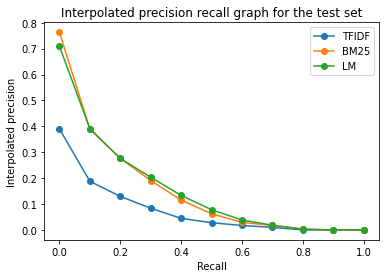

Interpolated precision on 11 points plotted against the recall for each system.


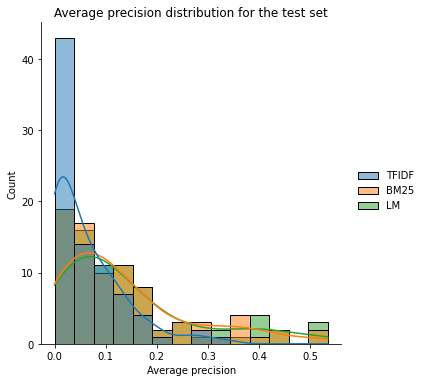

Distribution of the average precision values for each system.


,TFIDF,BM25,LM
count,83.000000,83.000000,83.000000
mean,0.061412,0.135814,0.141395
std,0.070109,0.126020,0.135072
min,0.000000,0.003500,0.001700
25%,0.008450,0.045700,0.042600
50%,0.034600,0.094900,0.099200
75%,0.093600,0.171750,0.184550
max,0.327100,0.522800,0.534400


Table describing the dataframe with the AP values for each system.


,Recall,AP for TFIDF,AP for BM25,% Change for BM25,AP for LM,% Change for LM
0,0.0,0.3904,0.7633,95.517418,0.7095,81.73668
1,0.1,0.1877,0.3888,107.139052,0.3911,108.364411
2,0.2,0.1295,0.2763,113.359073,0.2758,112.972973
3,0.3,0.0837,0.1904,127.479092,0.2033,142.891278
4,0.4,0.0446,0.1154,158.744395,0.1333,198.878924
5,0.5,0.0279,0.0625,124.014337,0.0780,179.569892
6,0.6,0.0171,0.0290,69.590643,0.0381,122.807018
7,0.7,0.0097,0.0171,76.28866,0.0182,87.628866
8,0.8,0.0000,0.0032,-,0.0030,-
9,0.9,0.0000,0.0000,-,0.0000,-


Table with MAP and average precision values for each system.
The BM25 and LM system are compared to the TFIDF system using significance tests.
working 0 /5
working 1 /5
working 2 /5
working 3 /5
working 4 /5
working 5 /5
working 0 /5
working 1 /5
working 2 /5
working 3 /5
working 4 /5
working 5 /5


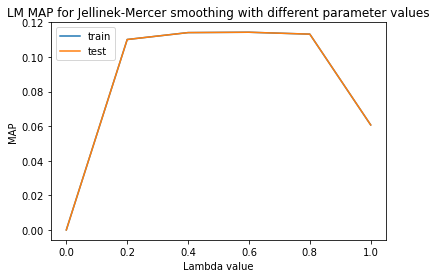

working 1 /4 0
working 2 /4 5
working 3 /4 10
working 4 /4 15
working 1 /4 0
working 2 /4 5
working 3 /4 10
working 4 /4 15


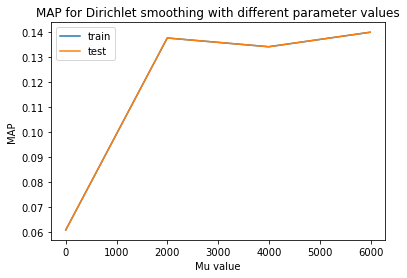

(Only plotted for multipliers 0, 5, 10, 15 due to time constraints)


True

In [8]:
%time
#%%memit
import json
import time

# Core code goes into this cell
# You may use other functions defined in previous (own created) cells to make your code more modular of course
# We will manually grade the output of this cell, and look at the code.


def create_index(document_collection):
    '''Creates an index for the collection of documents.'''
    start = time.time()
    # Loading from disk if possible, to save time.
    try:
        with open('index.json', 'r') as json_file:
            print('loading from disk')
            return json.load(json_file)
    except (OSError, IOError) as e:
        Index = defaultdict(lambda: defaultdict(int))
        path = trec_data_path + document_collection

        doc_pattern = re.compile(r'(<DOC>.*?</DOC>)', re.DOTALL)
        docno_pattern = re.compile(r'<DOCNO> (.*?) </DOCNO>', re.DOTALL)
        text_pattern = re.compile(r'(<TEXT>.*?</TEXT>)', re.DOTALL)
        strip_pattern = re.compile(r'<.*?>', re.DOTALL)
        
        total_files = 0
        doc_norms = dict()
        doc_lengths = defaultdict(int)

        stemmer  = PorterStemmer()
        lookuptable = dict()

        for root, dirs, files in os.walk(path):
            for file in tqdm(files):
                if file not in ['.DS_Store', 'readme']:
                    total_files += 1

                    with open(root + '/' + file, 'r', encoding='latin-1') as f:
                        documents = re.findall(doc_pattern, f.read())

                    for doc in documents:
                        docno = re.search(docno_pattern, doc).group(1)
                        
                        text = ' '.join(re.findall(text_pattern, doc))
                        text = re.sub(strip_pattern, ' ', text)
                        
                        tokens = nltk.word_tokenize(text)
                        
                        stemmed_tokens = list()
                        
                        # Use lookuptable to minimize running stemmer.stem
                        for token in tokens:
                            if token in lookuptable:
                                stemmed_tokens.append(lookuptable[token])
                            else:
                                stem_token = stemmer.stem(token)
                                stemmed_tokens.append(stem_token)
                                lookuptable[token] = stem_token
                        
                        
                        # Only add document if it has any information in it.
                        if len(stemmed_tokens) > 0:
                            doc_lengths[docno] = len(stemmed_tokens)
                            counts = Counter(stemmed_tokens)
                            
                            doc_norms[docno] = np.linalg.norm(list(counts.values()))
                            
                            for word, count in counts.items():
                                Index[word][docno] = count
                                

        NewIndex = {}
        
        for token, docdict in Index.items():
            NewIndex[token] = {'DocFreq': len(docdict), 'CorpusFreq': sum(docdict.values()), 'Freq_per_Doc': docdict}

        NewIndex['DocNorms'] = doc_norms
        NewIndex['DocSizes'] = doc_lengths
        NewIndex['CollectionSize'] = sum(doc_lengths.values())
        NewIndex['TotalFiles'] = total_files
        NewIndex['TotalDocuments'] = len(doc_lengths)
        NewIndex['VocSize'] = len(Index)

        print('Writing index to disk...')
        with open('index.json', 'w') as file:
            file.write(json.dumps(NewIndex))
        dt = int(time.time() - start)
        print('index_build_time:', dt//60, 'm', dt % 60,'s')
        return NewIndex   

    
def run_queries(index, query_set='train',model='LM',studid=1234567):
    '''Runs all queries in query_set using the index, and ranks the results using model.'''
    # Loading data
    path = trec_data_path + 'queries/queries_' + query_set + '.csv'
    stemmer  = PorterStemmer()
    qset = pd.read_csv(path)
    
    # preproces titles and description
    q_titles = [nltk.word_tokenize(sentence) for sentence in qset['title']]
    q_titles = [[stemmer.stem(word) for word in query] for query in q_titles]
    q_tpl = list(zip(list(qset['q_id']), q_titles))
                                                                                               
    # calc 1000 highest ranking docs for every query from index with model and add to formatted_ranks
    formatted_ranks = [] 
    
    if model == 'BM25':
        for q_id, q_title in q_tpl:   
            BM25ranking = BM25(q_title, index)
            formatted_ranks.append(formatranking(BM25ranking, q_id))

        # remove nested lists for every query
        resultslist = [doc for query in formatted_ranks for doc in query]
        return pd.DataFrame(resultslist)
    
    if model == 'LM':
        for q_id, q_title in q_tpl:
            #LMranking = LM(q_title, index)
            LMranking = LM(q_title, index, model='Dirichlet smoothing')
            formatted_ranks.append(formatranking(LMranking, q_id))
        resultslist = [doc for query in formatted_ranks for doc in query]
        return pd.DataFrame(resultslist)

    if model == 'TFIDF':
        for q_id, q_title in q_tpl:   
            TFIDFranking = rankedSearchTfidf(q_title, index)
            formatted_ranks.append(formatranking(TFIDFranking, q_id))
        resultslist = [doc for query in formatted_ranks for doc in query]
        return pd.DataFrame(resultslist)
    

def evaluate(index, studid):
    i = 0
    print('0/6 starting evaluation...')
    for run in ["train","test"]:
        for model in ["BM25","TFIDF","LM"]:
            start = time.time()
            resultsdf=run_queries(index, query_set=run,model=model,studid=studid)
            filename= 'results_'+run+'_'+str(studid)+'_'+model
            resultsdf.to_csv(filename, sep='\t', header=None, index=False)
            i += 1
            dt = int(time.time() - start)
            print(str(i)+'/6', dt//60, 'm', dt % 60,'s  filename:', filename)
            pass
        
        PR_plot(run, studid)
        AP_graph(run, studid)
        AP_table(run, studid)
        
    LM_lambda_plot(index)
    LM_mu_plot(index)  
        
        
def runmyexperiment():
    # your code here, doing what is described above
    # in particular it will output plots and tables (make sure to print them)
    index = create_index('docs/')
    evaluate(index, 12208698)
    return True 

runmyexperiment()

In [9]:
# Here we give the 5 points for overall look and feel and the tables and plots

In [10]:
# disclaimer: this does not work on the new test set
resultfiles= !ls results*

for f in resultfiles:
    print(f)
    ! $trec_eval_path/trec_eval -m map  $trec_data_path/qrels/qrels_train.txt $f

results_test_12208698_BM25
map                   	all	0.1344
results_test_12208698_LM
map                   	all	0.1398
results_test_12208698_TFIDF
map                   	all	0.0607
results_train_12208698_BM25
map                   	all	0.1344
results_train_12208698_LM
map                   	all	0.1398
results_train_12208698_TFIDF
map                   	all	0.0607


In [11]:
# here we check your result file, this cell should not give errors

resultfiles= !ls results*

for f in resultfiles:
    print(f)
    check_output_df= pd.read_csv(f, sep='\t', header=None)
    print(check_output_df.head(2))
    assert check_output_df.shape[1]==6
    assert check_output_df[1][0]=='Q0'  # constant
    assert np.issubdtype(check_output_df[0].dtype, np.integer) # query id
    assert np.issubdtype(check_output_df[3].dtype, np.integer) # rank is an integer
    assert np.issubdtype(check_output_df[4].dtype, np.floating) # score must be a float

results_test_12208698_BM25
    0   1               2  3          4         5
0  51  Q0  WSJ871218-0126  1  40.857116  STANDARD
1  51  Q0  WSJ871012-0049  2  38.899461  STANDARD
results_test_12208698_LM
    0   1               2  3         4         5
0  51  Q0  WSJ871218-0126  1  0.000017  STANDARD
1  51  Q0  WSJ870316-0068  2  0.000010  STANDARD
results_test_12208698_TFIDF
    0   1               2  3           4         5
0  51  Q0  WSJ870311-0034  1  284.223549  STANDARD
1  51  Q0  WSJ890810-0103  2  266.811962  STANDARD
results_train_12208698_BM25
    0   1               2  3          4         5
0  51  Q0  WSJ871218-0126  1  40.857116  STANDARD
1  51  Q0  WSJ871012-0049  2  38.899461  STANDARD
results_train_12208698_LM
    0   1               2  3         4         5
0  51  Q0  WSJ871218-0126  1  0.000017  STANDARD
1  51  Q0  WSJ870316-0068  2  0.000010  STANDARD
results_train_12208698_TFIDF
    0   1               2  3           4         5
0  51  Q0  WSJ870311-0034  1  284.22354